<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sat Jun 14 12:01:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.52                 Driver Version: 576.52         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2050      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   44C    P8              3W /   55W |     194MiB /   4096MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.5.1+cu121


### 1. What are 3 areas in industry where computer vision is currently being used?

In [4]:
cv_applications = ["Image Recognition", "autonomous vehicles", "Disease classification"]
print("Areas in Industry where computer vision is currently being used are:")
for i,cv_application in enumerate(cv_applications):
    print(f"{i+1}. {cv_application}")


Areas in Industry where computer vision is currently being used are:
1. Image Recognition
2. autonomous vehicles
3. Disease classification


### 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

In [ ]:
print(f"Overfitting in machine learning means a model doesn't properly gets trained rather it starts to memorize the data instead of learning patterns. Hence during testing on unseen data it performs horrible. That it what Overfitting mean in machine learning.")

### 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [5]:
prev_overft = ["Hyperparameter-tuning", "Cross-validation","Feature selection", "trying out different models","regularization","increase time of training and testing"]

print("Ways to prevent overfitting in machine learning")
for i,prev in enumerate(prev_overft):
    print(f"{i+1}. {prev}")

Ways to prevent overfitting in machine learning
1. Hyperparameter-tuning
2. Cross-validation
3. Feature selection
4. trying out different models
5. regularization
6. increase time of training and testing


### 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [ ]:
# ✅✅✅

### 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [11]:
# Import PyTorch

import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# 1. Load the data (your existing code is correct)
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


In [8]:
len(train_data), len(test_data)

(60000, 10000)

### 6. Visualize at least 5 different samples of the MNIST training dataset.

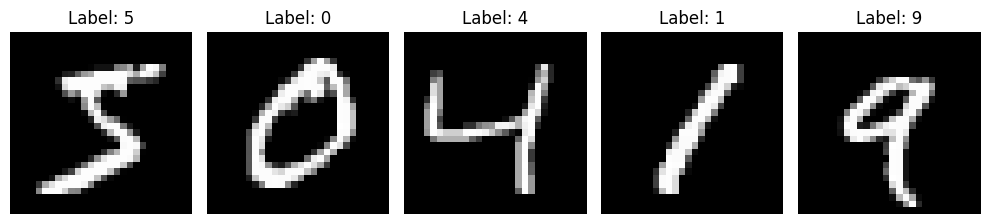

Training samples: 60000
Test samples: 10000
Image shape: torch.Size([1, 28, 28])


In [12]:
plt.figure(figsize=(10, 5))
for i in range(5):
    # Get a sample (returns tuple of image tensor and label)
    image, label = train_data[i]
    
    plt.subplot(1, 5, i+1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis(False)

plt.tight_layout()
plt.show()

# 3. Print dataset information
print(f"Training samples: {len(train_data)}")
print(f"Test samples: {len(test_data)}")
print(f"Image shape: {train_data[0][0].shape}")  # First image tensor shape

### 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [13]:
from torch.utils.data.dataloader import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset= train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
    )

test_dataloader = DataLoader(
    dataset= test_data,
    shuffle=False,
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x28952723df0>,
 <torch.utils.data.dataloader.DataLoader at 0x28952721c60>)

### 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [14]:
class MNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_unit: int,
                 output_shape: int):
        super().__init__()

        self.conv_layer1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_unit, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit, out_channels=hidden_unit, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_layer2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_unit, out_channels=hidden_unit, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_unit, out_channels=hidden_unit, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # We'll determine the in_features dynamically 🖐️ GPT Wrote it.
        self._dummy_input = torch.randn(1, input_shape, 28, 28)
        self._out_shape = self._get_flattened_shape(self._dummy_input, hidden_unit)

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self._out_shape, output_shape)
        )

    def _get_flattened_shape(self, x, hidden_units): #🖐️ GPT wrote it.
        with torch.no_grad():
            x = self.conv_block_1(x)
            x = self.conv_block_2(x)
            return x.view(1, -1).shape[1]

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

### 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
from timeit import default_timer as timer

epochs = 5

### 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

### 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

### 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

### 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?